In [1]:
# References
# https://www.kaggle.com/code/farizdarari/simple-map-visualization-using-geopandas
# https://sulut.bps.go.id/id/statistics-table/2/OTU4IzI=/jumlah-penduduk-menurut-provinsi-diindonesia.html
# https://www.bps.go.id/id/statistics-table/3/VUZwV01tSlpPVlpsWlRKbmMxcFhhSGhEVjFoUFFUMDkjMw==/luas-daerah-dan-jumlah-pulau-menurut-provinsi.html
# https://github.com/Vizzuality/growasia_calculator/tree/master/public

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [3]:
df_map = gpd.read_file("indonesia.geojson")
df_map.head()

,cartodb_id,country,id_1,slug,state,geometry
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.6275, 98.00173 4.60..."
1,2,Indonesia,31,indonesia-sumaterabarat,Sumatera Barat,"MULTIPOLYGON (((99.17167 -1.5025, 99.205 -1.52..."
2,8,Indonesia,34,indonesia-yogyakarta,Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ..."
3,20,Indonesia,33,indonesia-sumaterautara,Sumatera Utara,"MULTIPOLYGON (((98.71384 3.76947, 99.05473 3.6..."
4,7,Indonesia,3,indonesia-bangkabelitung,Bangka-Belitung,"MULTIPOLYGON (((105.34754 -1.84469, 105.39079 ..."


In [4]:
# Rename and sorting

df_map.replace("Bangka-Belitung", "Kep. Bangka Belitung", inplace=True)
df_map.replace("Kepulauan Riau", "Kep. Riau", inplace=True)
df_map.replace("Yogyakarta", "DI Yogyakarta", inplace=True)
df_map.replace("Jakarta Raya", "DKI Jakarta", inplace=True)
df_map = df_map.sort_values(by="state") # Provinsi
df_map = df_map.reset_index(drop=True)
df_map.head()

,cartodb_id,country,id_1,slug,state,geometry
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.6275, 98.00173 4.60..."
1,31,Indonesia,2,indonesia-bali,Bali,"MULTIPOLYGON (((115.19667 -8.73527, 115.18222 ..."
2,30,Indonesia,4,indonesia-banten,Banten,"MULTIPOLYGON (((106.27354 -5.8075, 106.29469 -..."
3,24,Indonesia,5,indonesia-bengkulu,Bengkulu,"MULTIPOLYGON (((102.56528 -4.17972, 102.28 -3...."
4,8,Indonesia,34,indonesia-yogyakarta,DI Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ..."


In [5]:
# Population density optained from (Population / Area (km^2))
# Population in 1000

df_pop = gpd.read_file("penduduk_detail.csv")
print(df_pop.dtypes)
df_pop = df_pop.iloc[:, 1:].apply(pd.to_numeric)
print(df_pop.dtypes)
df_pop.head()

Provinsi                   object
Penduduk_2021              object
Penduduk_2022              object
Penduduk_2023              object
Penduduk_2024              object
Luas_Wilayah_km2           object
Kerapatan_Penduduk_2021    object
Kerapatan_Penduduk_2022    object
Kerapatan_Penduduk_2023    object
Kerapatan_Penduduk_2024    object
dtype: object
Penduduk_2021              float64
Penduduk_2022              float64
Penduduk_2023              float64
Penduduk_2024              float64
Luas_Wilayah_km2           float64
Kerapatan_Penduduk_2021    float64
Kerapatan_Penduduk_2022    float64
Kerapatan_Penduduk_2023    float64
Kerapatan_Penduduk_2024    float64
dtype: object


,Penduduk_2021,Penduduk_2022,Penduduk_2023,Penduduk_2024,Luas_Wilayah_km2,Kerapatan_Penduduk_2021,Kerapatan_Penduduk_2022,Kerapatan_Penduduk_2023,Kerapatan_Penduduk_2024
0,5274.9,5334.9,5409.2,5554.8,56834.75,92.811176,93.866868,95.174167,97.735980
1,4317.4,4343.4,4374.3,4433.3,5590.15,772.322746,776.973784,782.501364,793.055642
2,11904.6,12023.0,12167.0,12431.4,9352.77,1272.842163,1285.501515,1300.898023,1329.167723
3,2010.7,2032.4,2059.4,2112.2,20128.34,99.893980,100.972062,102.313455,104.936622
4,3668.7,3687.8,3712.6,3759.5,3170.65,1157.081356,1163.105357,1170.927097,1185.719017


In [6]:
# Combine map data and population (also in data

#df = pd.concat([df_map, df_pop.iloc[:,1:]], axis=1)
df = pd.concat([df_map, df_pop], axis=1)

In [7]:
df

,cartodb_id,country,id_1,slug,state,geometry,Penduduk_2021,Penduduk_2022,Penduduk_2023,Penduduk_2024,Luas_Wilayah_km2,Kerapatan_Penduduk_2021,Kerapatan_Penduduk_2022,Kerapatan_Penduduk_2023,Kerapatan_Penduduk_2024
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.6275, 98.00173 4.60...",5274.9,5334.9,5409.2,5554.8,56834.75,92.811176,93.866868,95.174167,97.735980
1,31,Indonesia,2,indonesia-bali,Bali,"MULTIPOLYGON (((115.19667 -8.73527, 115.18222 ...",4317.4,4343.4,4374.3,4433.3,5590.15,772.322746,776.973784,782.501364,793.055642
2,30,Indonesia,4,indonesia-banten,Banten,"MULTIPOLYGON (((106.27354 -5.8075, 106.29469 -...",11904.6,12023.0,12167.0,12431.4,9352.77,1272.842163,1285.501515,1300.898023,1329.167723
3,24,Indonesia,5,indonesia-bengkulu,Bengkulu,"MULTIPOLYGON (((102.56528 -4.17972, 102.28 -3....",2010.7,2032.4,2059.4,2112.2,20128.34,99.893980,100.972062,102.313455,104.936622
4,8,Indonesia,34,indonesia-yogyakarta,DI Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ...",3668.7,3687.8,3712.6,3759.5,3170.65,1157.081356,1163.105357,1170.927097,1185.719017
5,25,Indonesia,8,indonesia-jakartaraya,DKI Jakarta,"MULTIPOLYGON (((106.71868 -6.22328, 106.72036 ...",10562.1,10605.4,10640.0,10684.9,660.98,15979.454750,16044.963540,16097.310050,16165.239490
6,32,Indonesia,6,indonesia-gorontalo,Gorontalo,"MULTIPOLYGON (((122.40639 0.51861, 122.15278 0...",1171.7,1183.5,1198.4,1227.8,12025.15,97.437454,98.418731,99.657801,102.102677
7,34,Indonesia,9,indonesia-jambi,Jambi,"MULTIPOLYGON (((102.08648 -2.76824, 101.98974 ...",3548.2,3586.4,3633.2,3724.3,49026.58,72.372986,73.152155,74.106740,75.964915
8,22,Indonesia,10,indonesia-jawabarat,Jawa Barat,"MULTIPOLYGON (((108.56916 -6.70834, 108.6025 -...",48274.2,48738.8,49306.8,50345.2,37044.86,1303.128153,1315.669704,1331.002466,1359.033345
9,23,Indonesia,11,indonesia-jawatengah,Jawa Tengah,"MULTIPOLYGON (((111.69288 -6.75461, 111.65528 ...",36516.0,36811.1,37180.4,37892.3,34337.49,1063.444067,1072.038172,1082.793180,1103.525622


In [8]:
# Function for plotting map

def plot_map(df_input, column_name):
    fig, ax = plt.subplots(1, 1, figsize=(20, 6))
    df_input.plot(column=column_name, 
            ax=ax, legend=True, cmap='coolwarm', 
            vmin=min(df[column_name]), 
            vmax=max(df[column_name])
           )

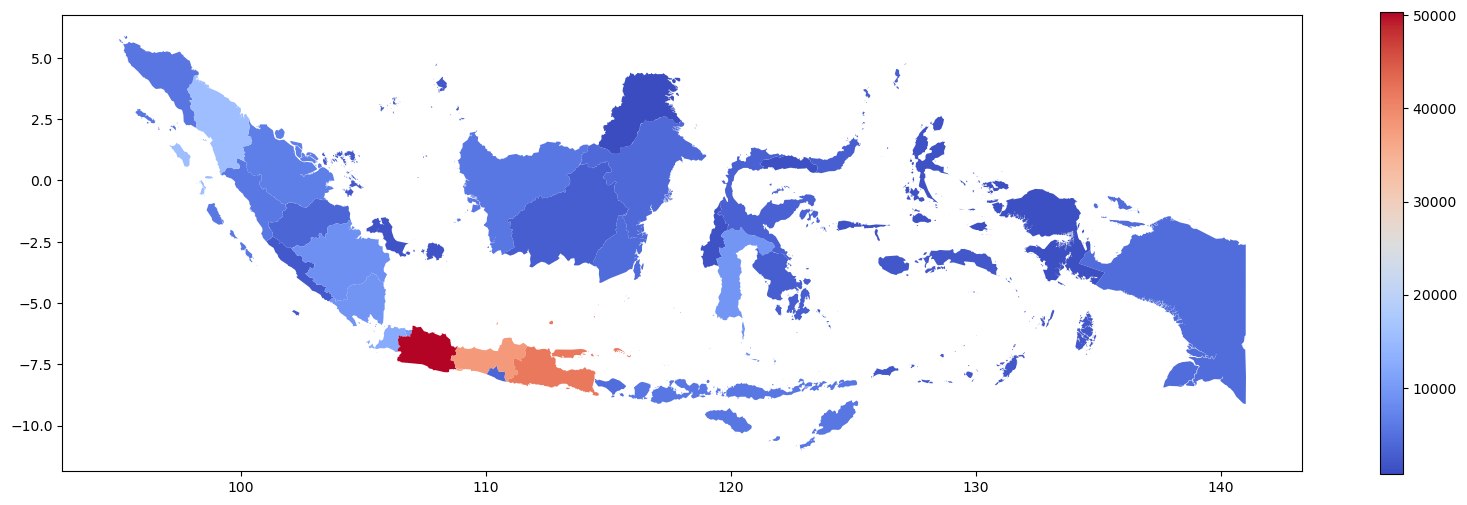

In [9]:
# Population (2024) map, Indonesia

plot_map(df, "Penduduk_2024")

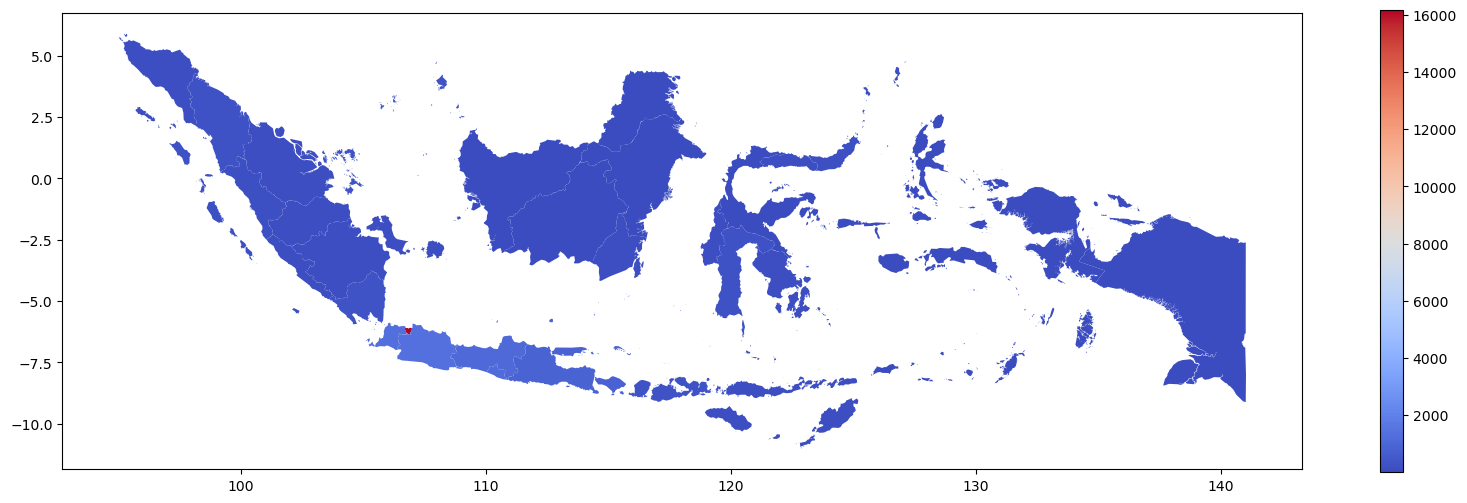

In [10]:
# Population density (2024) map, Indonesia

plot_map(df, "Kerapatan_Penduduk_2024")

In [11]:
# Java Island data

df_java = df.iloc[[2, 4, 5, 8, 9, 10]]
df_java = df_java.reset_index(drop=True)
df_java

,cartodb_id,country,id_1,slug,state,geometry,Penduduk_2021,Penduduk_2022,Penduduk_2023,Penduduk_2024,Luas_Wilayah_km2,Kerapatan_Penduduk_2021,Kerapatan_Penduduk_2022,Kerapatan_Penduduk_2023,Kerapatan_Penduduk_2024
0,30,Indonesia,4,indonesia-banten,Banten,"MULTIPOLYGON (((106.27354 -5.8075, 106.29469 -...",11904.6,12023.0,12167.0,12431.4,9352.77,1272.842163,1285.501515,1300.898023,1329.167723
1,8,Indonesia,34,indonesia-yogyakarta,DI Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ...",3668.7,3687.8,3712.6,3759.5,3170.65,1157.081356,1163.105357,1170.927097,1185.719017
2,25,Indonesia,8,indonesia-jakartaraya,DKI Jakarta,"MULTIPOLYGON (((106.71868 -6.22328, 106.72036 ...",10562.1,10605.4,10640.0,10684.9,660.98,15979.454750,16044.963540,16097.310050,16165.239490
3,22,Indonesia,10,indonesia-jawabarat,Jawa Barat,"MULTIPOLYGON (((108.56916 -6.70834, 108.6025 -...",48274.2,48738.8,49306.8,50345.2,37044.86,1303.128153,1315.669704,1331.002466,1359.033345
4,23,Indonesia,11,indonesia-jawatengah,Jawa Tengah,"MULTIPOLYGON (((111.69288 -6.75461, 111.65528 ...",36516.0,36811.1,37180.4,37892.3,34337.49,1063.444067,1072.038172,1082.793180,1103.525622
5,4,Indonesia,12,indonesia-jawatimur,Jawa Timur,"MULTIPOLYGON (((113.59208 -7.71486, 113.66695 ...",40665.7,40921.1,41230.0,41814.5,48036.84,846.552354,851.869107,858.299588,870.467333


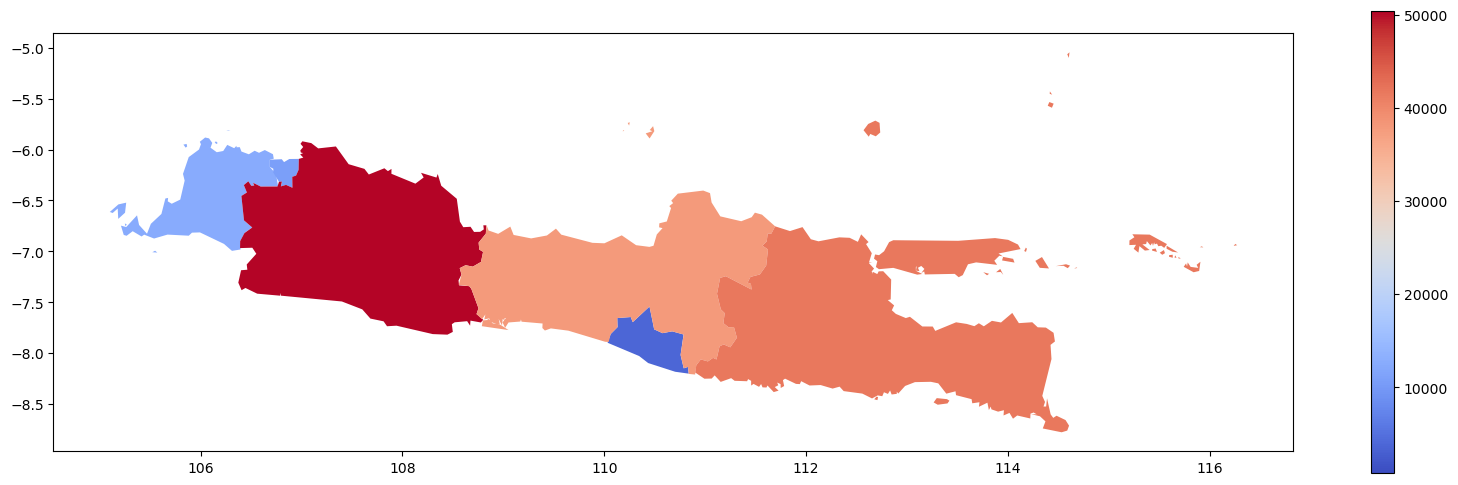

In [12]:
# Population (2024) in Java map, Indonesia

plot_map(df_java, "Penduduk_2024")

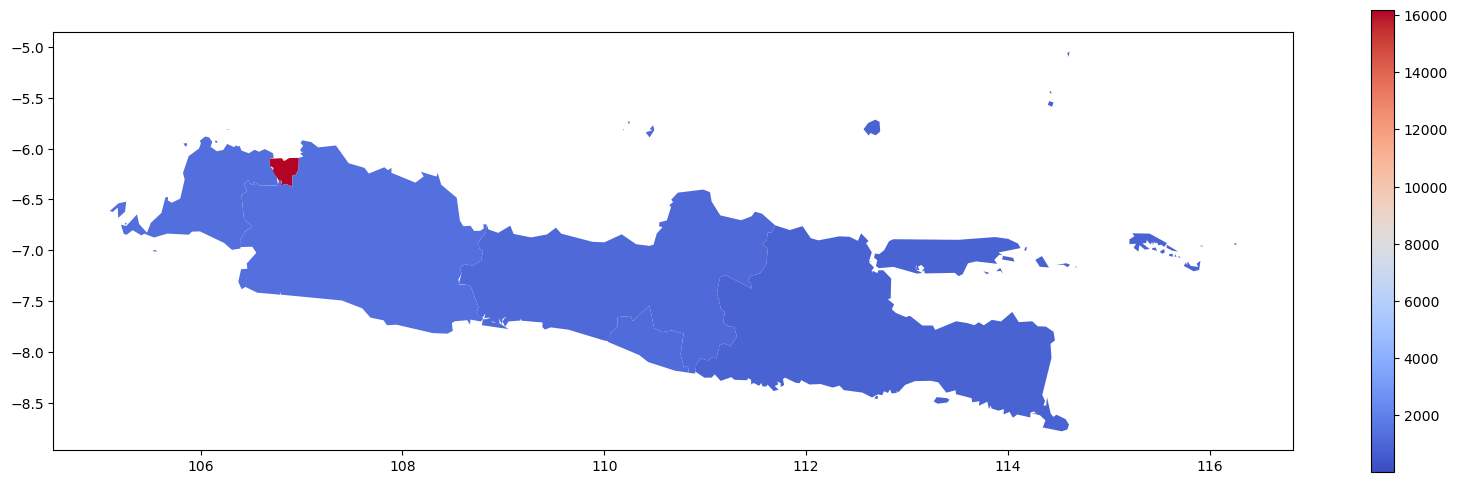

In [13]:
# Population density (2024) in Java map, Indonesia

plot_map(df_java, "Kerapatan_Penduduk_2024")

In [16]:
# Function for bar chart

def plot_bar(df_input, column_name):
    fig, ax = plt.subplots(1, 1, figsize=(20, 6))
    plt.bar(df_input["state"], df_input[column_name], 
            color ="maroon", width = 0.6
           )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\Zaini\AppData\Local\Temp\ipykernel_5808\4268879975.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


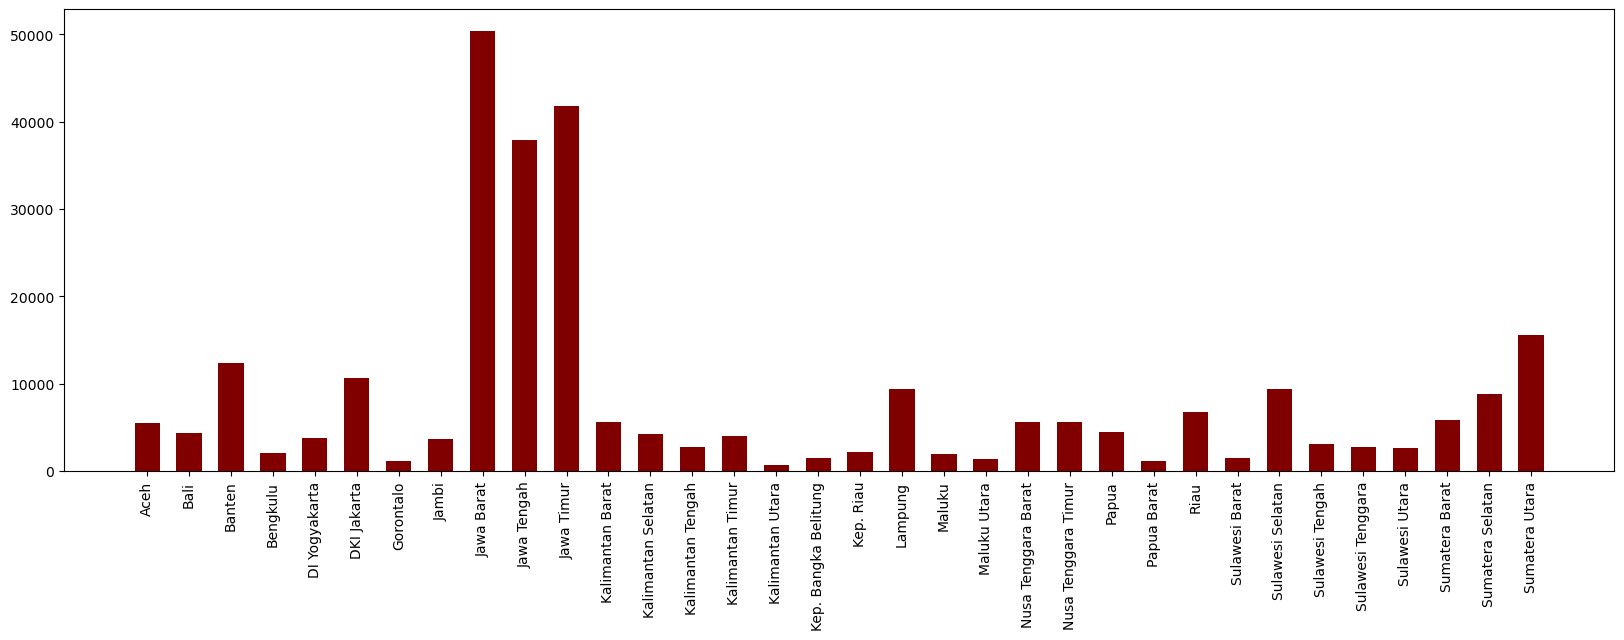

In [19]:
# Population (2024) bar chart, Indonesia

plot_bar(df, "Penduduk_2024")

C:\Users\Zaini\AppData\Local\Temp\ipykernel_5808\4268879975.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


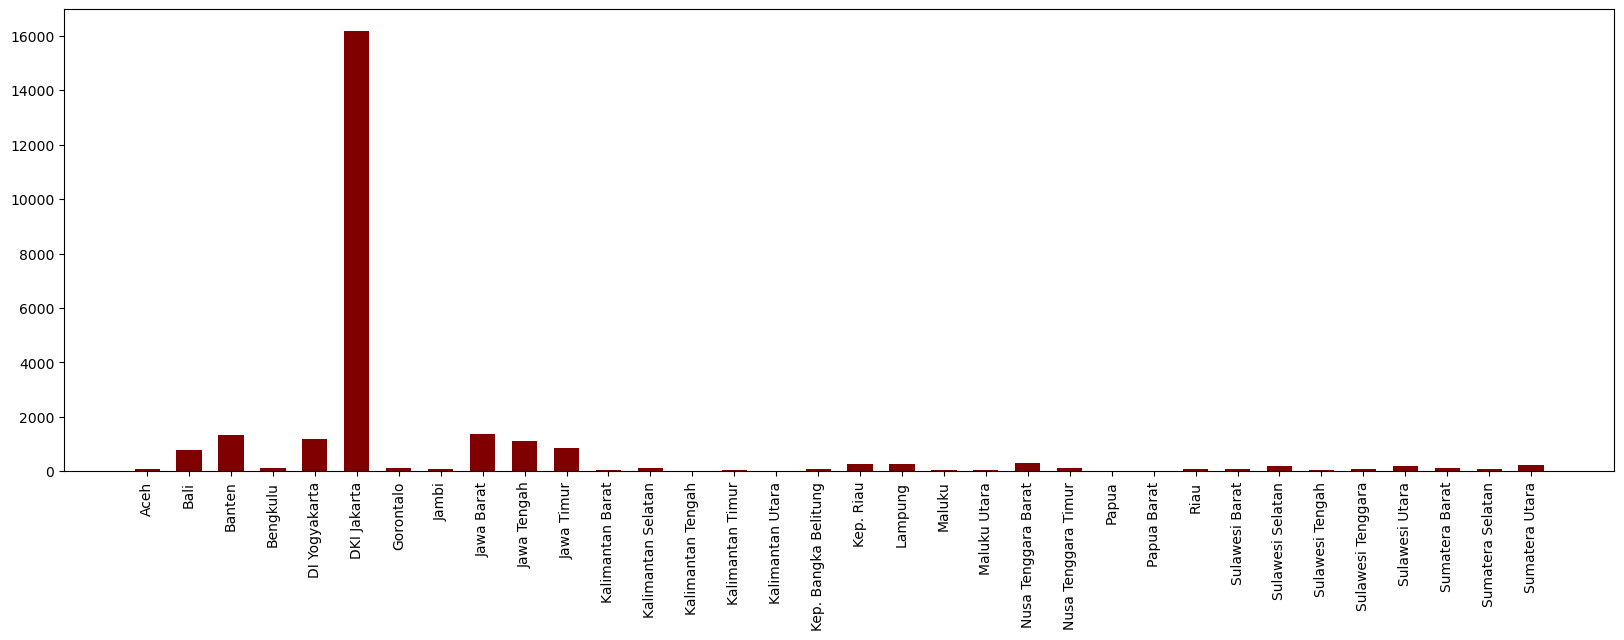

In [20]:
# Population density (2024) bar chart, Indonesia

plot_bar(df, "Kerapatan_Penduduk_2024")